In [1]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('processed_data.csv')

df_majority = df[df['Privacy Exists']==0]
df_minority = df[df['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2750,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.iloc[:, 1:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)

X_new = SelectKBest(f_classif, k=80).fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

"""
checked_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=130, max_depth = 100, min_samples_split = 6,min_samples_leaf = 3, bootstrap = False,max_features = 'auto'),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000),
    'SVM' : SVC(kernel = "poly", degree = 3, coef0=1, C=5),
    'Gradient Boosting': GradientBoostingClassifier()
}
"""


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=130, max_depth = 100, min_samples_split = 6,min_samples_leaf = 3, bootstrap = False,max_features = 'auto'),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000),
    'SVM' : SVC(kernel = "poly", degree = 3, coef0=1, C=5),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


for name, model in models.items():
    print('Training', name)

    clf = model
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train = cross_val_score(clf, y_train, y_pred_train, cv=10)
    print('train cross val',scores_train.mean())
    scores_test = cross_val_score(clf, y_test, y_pred_test, cv=10)
    print('test cross val',scores_test.mean())

    scores_train = accuracy_score(y_train, y_pred_train)
    print('train acc',scores_train.mean())
    scores_test = accuracy_score(y_test, y_pred_test)
    print('test acc',scores_test.mean())

Training Logistic Regression
train cross val 0.6617155571701028
test cross val 0.6540115798180316
train acc 0.6617120836774016
test acc 0.6540436456996149
Training Random Forest
train cross val 0.9655919837738021
test cross val 0.7060297766749379
train acc 0.9655931736856592
test acc 0.7060333761232349
Training Neural Networks
train cross val 0.816423727787364
test cross val 0.6918817204301074
train acc 0.8164051747866776
test acc 0.6919127086007703
Training SVM
train cross val 0.6864945660400206
test cross val 0.6681679073614557
train acc 0.6864849986237269
test acc 0.6501925545571245
Training Gradient Boosting
train cross val 0.7847629643084189
test cross val 0.7201612903225806
train acc 0.7847508945774841
test acc 0.7201540436456996


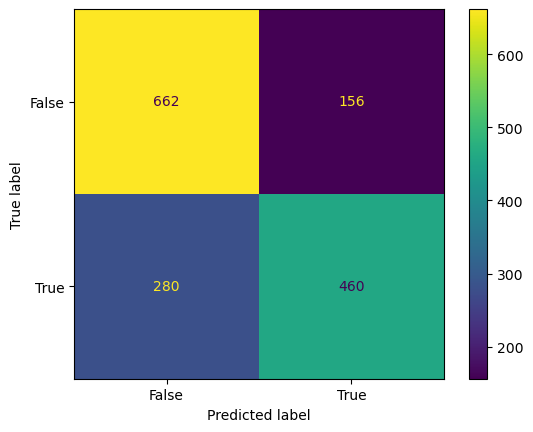

<Figure size 640x480 with 0 Axes>

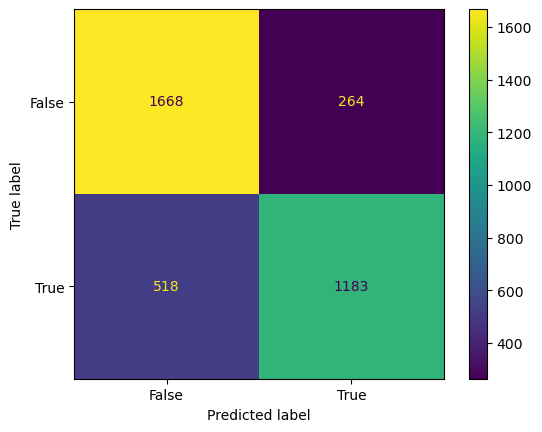

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.figure()

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()